In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import networkx as nx
import math

df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Clean the data through removal
df = df.dropna()
df = df.drop_duplicates()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [3]:
# Group by type, director, rating, and country
p = df.groupby(['rating','country']).size().reset_index(name='count')
p = p.drop('count',axis=1)
p = p.drop_duplicates()
p

,rating,country
0,G,Canada
1,G,"Canada, Japan, United States"
2,G,"France, Switzerland, Spain, United States, Uni..."
3,G,"Germany, United States"
4,G,"Ireland, United Kingdom, United States"
...,...,...
930,TV-Y7-FV,United States
931,TV-Y7-FV,"United States, Italy"
932,UR,France
933,UR,"United Kingdom, France"


In [5]:
# Removed type since it won't impact results
#p['type'].nunique() # 2
# Removed director since it would have been too clustered
# p['director'].nunique() # 3945
p['rating'].nunique() # 14
p['country'].nunique() # 604

604

In [23]:
p['type'].nunique()

2

618


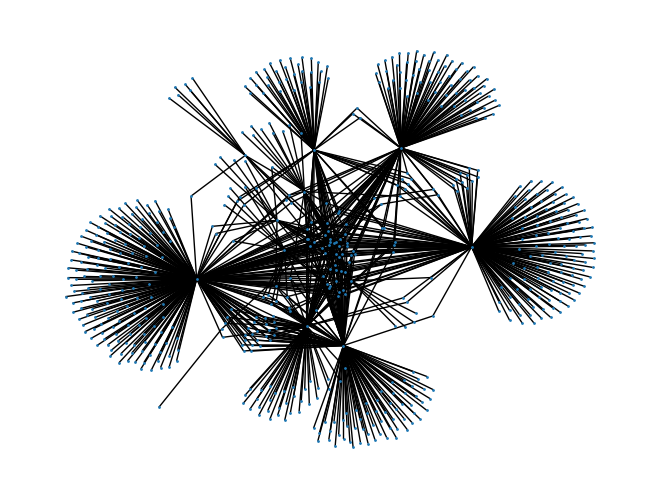

In [4]:
from random import random 
# Decide the number of nodes,
# https://networkx.org/documentation/stable/reference/classes/graph.html

NUMBER_OF_NODES = p['rating'].nunique() + p['country'].nunique()
# NUMBER_OF_NODES = 618
typePoints = []
dirPoints = []
ratPoints = []
counPoints = []

#for x in range(p['type'].nunique()):
#    typePoints.append([random(),random()])
for x in range(p['rating'].nunique()):
    ratPoints.append([random(),random()])
for x in range(p['country'].nunique()):
    counPoints.append([random(),random()])

    
    
G = nx.Graph()

#for x in range(p['type'].nunique()):
#    G.add_node(p['type'].unique()[x], pos = typePoints[x])
    
for x in range(p['rating'].nunique()):
    G.add_node(p['rating'].unique()[x], pos = ratPoints[x])
    
for x in range(p['country'].nunique()):
    G.add_node(p['country'].unique()[x], pos = counPoints[x])
    
#G.add_nodes_from(p['type'], pos = typePoints)
#G.add_nodes_from(p['director'], pos = dirPoints)
#G.add_nodes_from(p['rating'].unique(), pos = ratPoints)
#G.add_nodes_from(p['country'], pos = counPoints)

#print(G.nodes.data('pos'))

# First add edges from director to type
for x in range(len(p['rating'])):
    #G.add_edge(p['type'][x],p['rating'][x])
    G.add_edge(p['rating'][x],p['country'][x])

print(len(G.nodes))
nx.draw(G, pos =nx.spring_layout(G), node_size = 1)
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#draw

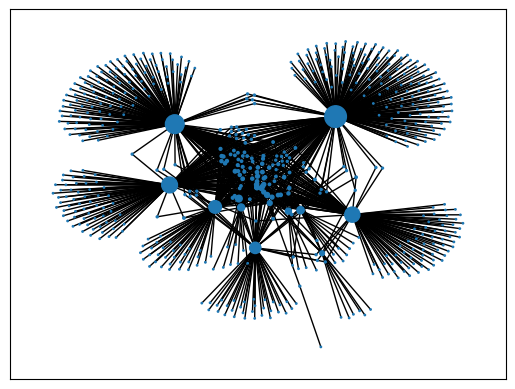

In [5]:
# Instead of using random positions, we shall use ones that actually make sense

node_adjacencies = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    

nx.draw_networkx(G, pos=nx.spring_layout(G), node_size=node_adjacencies, with_labels=False)

In [7]:
L = nx.spring_layout(G)

F = nx.Graph()

for x in range(p['rating'].nunique()):
    F.add_node(p['rating'].unique()[x], pos = L[p['rating'].unique()[x]])
    
for x in range(p['country'].nunique()):
    F.add_node(p['country'].unique()[x], pos = L[p['country'].unique()[x]])
    
for x in range(len(p['rating'])):
    #G.add_edge(p['type'][x],p['rating'][x])
    F.add_edge(p['rating'][x],p['country'][x])

In [10]:
  
edge_x = []
edge_y = []
for edge in F.edges():
    x0, y0 = F.nodes[edge[0]]['pos']
    x1, y1 = F.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in F.nodes():
    x, y = F.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

    
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(F.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(adjacencies[0])+' # of connections: '+str(len(adjacencies[1])))

    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=node_adjacencies,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace,node_trace],
             layout=go.Layout(
                title='Rating Popularity',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [28]:
# FINAL****


# Credit to https://plotly.com/ipython-notebooks/network-graphs/
edge_x = []
edge_y = []
for edge in F.edges():
    x0, y0 = F.nodes[edge[0]]['pos']
    x1, y1 = F.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

node_x = []
node_y = []
for node in F.nodes():
    x, y = F.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

    
node_adjacencies = []
node_adjacencies_morphed = []
node_text = []
node_text_morphed = []

for node, adjacencies in enumerate(F.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(adjacencies[0])+' # of connections: '+str(len(adjacencies[1])))
    # Calculations, larger values grow at a much smaller pace
    num = 5*math.log2(len(adjacencies[1]))+8
    node_adjacencies_morphed.append(num)
    
    if len(adjacencies[1]) > 19:
        node_text_morphed.append(str(adjacencies[0]))
    else:
        node_text_morphed.append("")

    
    
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

    
    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlOrRd',
        reversescale=True,
        color=[],
        size=node_adjacencies_morphed,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


node_trace.marker.color = node_adjacencies
node_trace.text = node_text

node_trace2 = go.Scatter(
    x=node_x, y=node_y,
    mode='text',
    text=node_text_morphed,
    textfont=dict(
        color='black',
        family='Gravitas One',
        size=18,
    )
)


fig = go.Figure(data=[edge_trace,node_trace,node_trace2],
             layout=go.Layout(
                title='Rating Popularity',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [15]:
# https://plotly.com/python/network-graphs/

# https://networkx.org/documentation/stable/reference/generators.html

# https://networkx.org/nx-guides/content/generators/geometric.html
# These look so cool

G = nx.random_geometric_graph(200, 0.125)
#print(G.nodes.data('pos'))

In [8]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

